<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Basic_Mask_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 119.41 MiB | 34.56 MiB/s, done.
Resolving deltas: 100% (569/569), done.


In [0]:
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")
sys.path.append(ROOT_DIR) 

In [7]:
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [0]:
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

In [0]:
%matplotlib inline 

In [0]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [11]:
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [0]:
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [13]:
# Configuration
class InferenceConfig (coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1
  
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [0]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [24]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)

W0622 12:28:42.629325 139831659878272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 12:28:42.676738 139831659878272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 12:28:42.683279 139831659878272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 12:28:42.719955 139831659878272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0622 12:28:42.725072 139831659

In [25]:
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (438, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


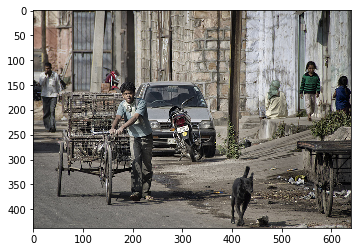

In [28]:
plt.imshow(image)

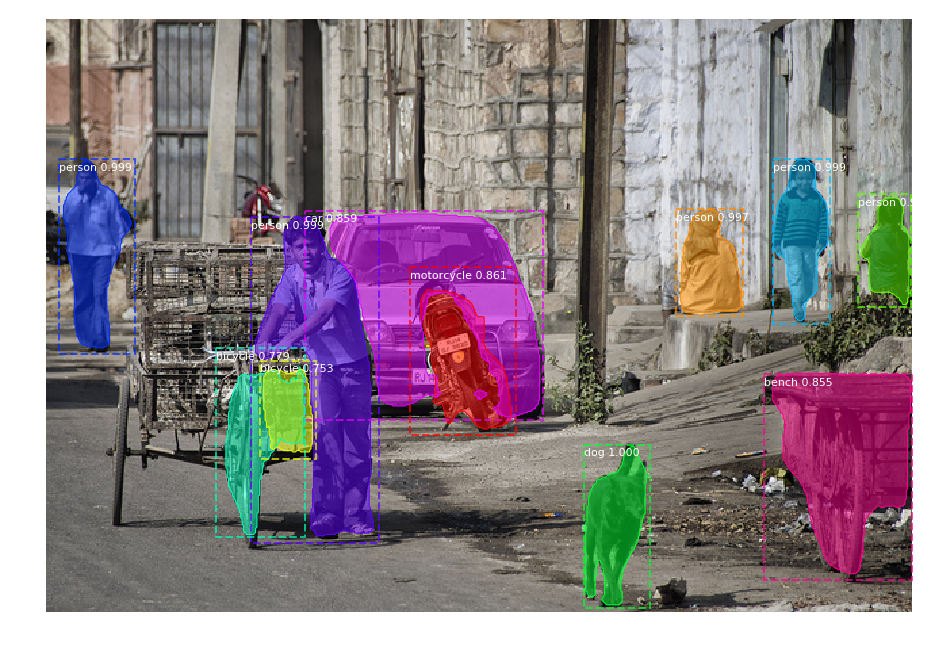

In [27]:
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [29]:
#Try
!wget https://st2.depositphotos.com/1832225/7660/i/950/depositphotos_76603753-stock-photo-indian-auto-rickshaw-with-taxi.jpg

--2019-06-22 12:34:20--  https://st2.depositphotos.com/1832225/7660/i/950/depositphotos_76603753-stock-photo-indian-auto-rickshaw-with-taxi.jpg
Resolving st2.depositphotos.com (st2.depositphotos.com)... 104.115.133.161
Connecting to st2.depositphotos.com (st2.depositphotos.com)|104.115.133.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129462 (126K) [image/jpeg]
Saving to: ‘depositphotos_76603753-stock-photo-indian-auto-rickshaw-with-taxi.jpg’

depositphotos_76603 100%[===================>] 126.43K  --.-KB/s    in 0.02s   

2019-06-22 12:34:20 (7.43 MB/s) - ‘depositphotos_76603753-stock-photo-indian-auto-rickshaw-with-taxi.jpg’ saved [129462/129462]



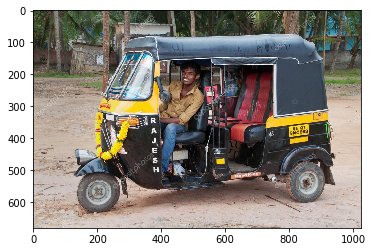

In [30]:
image = skimage.io.imread("/content/depositphotos_76603753-stock-photo-indian-auto-rickshaw-with-taxi.jpg")
plt.imshow(image)

In [31]:
results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (680, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


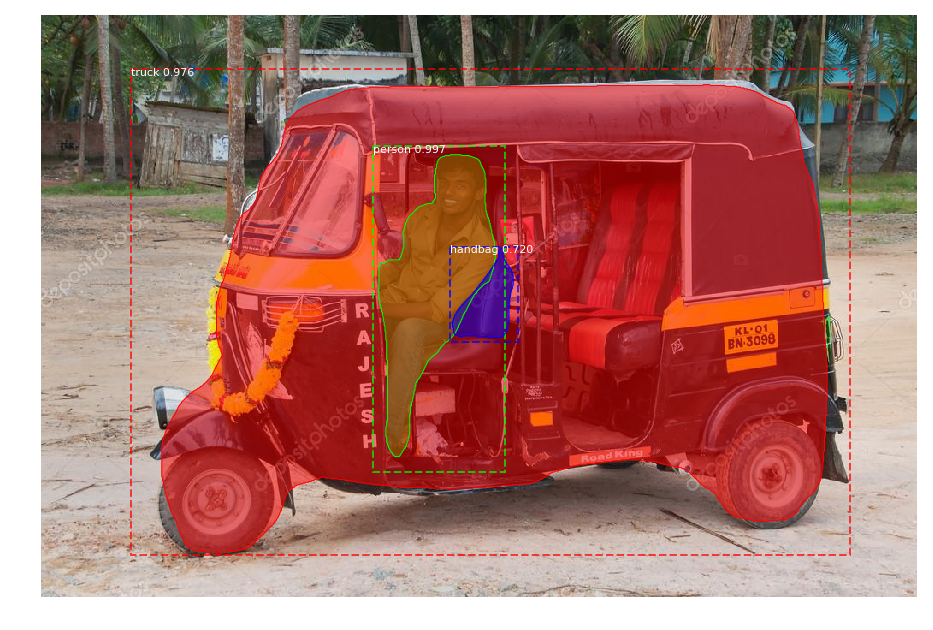

In [32]:
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [39]:
np.array(class_names)[r['class_ids']]

array(['person', 'truck', 'handbag'], dtype='<U14')

In [40]:
r['scores']

array([0.99650395, 0.97617936, 0.72049713], dtype=float32)

In [41]:
r['rois']

array([[152, 388, 534, 542],
       [ 62, 104, 631, 945],
       [270, 477, 381, 557]], dtype=int32)